<a href="https://colab.research.google.com/github/georgeduranh/ML/blob/main/3_deep_learning/creating_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

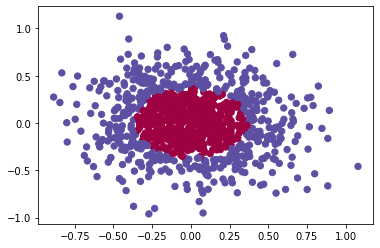

In [18]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

Activaton function

In [19]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

Loss Function 

In [20]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

Intatlizing parameters

In [21]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

Neural network

In [23]:
layer_dims = [2, 4, 8, 1]

parameters = initialize_parameters_deep (layer_dims)
parameters

{'W1': array([[ 0.80329548, -0.11882769, -0.77635812, -0.99736941],
        [-0.18307817, -0.96173977, -0.54052896, -0.60323572]]),
 'b1': array([[ 0.42390129,  0.72848497,  0.72207176, -0.75177151]]),
 'W2': array([[ 0.90384115, -0.99564459, -0.91446028,  0.83907402,  0.57878841,
          0.20206889, -0.19936683, -0.84097417],
        [ 0.80685326,  0.97321904, -0.59488482, -0.51829012, -0.09325703,
          0.33593345,  0.09009509,  0.57829579],
        [ 0.41332858, -0.66042781, -0.69101173,  0.89666749, -0.8407343 ,
          0.92641102, -0.68921263,  0.36386724],
        [-0.24028482, -0.42213634,  0.15751847, -0.69685823, -0.56235068,
         -0.69516388, -0.11049747,  0.28060294]]),
 'b2': array([[ 0.17543404, -0.51488289, -0.67209737, -0.54865057,  0.8195908 ,
         -0.35619129, -0.66052134,  0.00810172]]),
 'W3': array([[-0.47282934],
        [ 0.35914197],
        [-0.78214063],
        [ 0.92568118],
        [ 0.68156298],
        [ 0.42869891],
        [-0.1584134 ],


In [25]:
parameters['W1'].shape

(2, 4)

In [26]:
np.matmul(X,parameters['W1'] )

array([[-0.31905789, -0.22279654,  0.1124574 ,  0.16936482],
       [ 0.10127643,  0.05719013, -0.04551419, -0.06512525],
       [-0.04364753,  0.12739957,  0.12993753,  0.15577681],
       ...,
       [ 0.05848029,  0.0662601 , -0.00216555, -0.00968882],
       [-0.00822699,  0.08533912,  0.06898834,  0.08087167],
       [ 0.19242273,  0.11940993, -0.07867581, -0.11470701]])

In [27]:
X@parameters['W1'] 

array([[-0.31905789, -0.22279654,  0.1124574 ,  0.16936482],
       [ 0.10127643,  0.05719013, -0.04551419, -0.06512525],
       [-0.04364753,  0.12739957,  0.12993753,  0.15577681],
       ...,
       [ 0.05848029,  0.0662601 , -0.00216555, -0.00968882],
       [-0.00822699,  0.08533912,  0.06898834,  0.08087167],
       [ 0.19242273,  0.11940993, -0.07867581, -0.11470701]])

In [43]:
## Trainning forward 

parameters['A0'] = X
parameters['Z1'] = np.matmul(parameters['A0'], parameters['W1'] )  + parameters['b1']
parameters['A1'] =  relu(parameters['Z1'])

parameters['Z2'] = np.matmul(parameters['A1'], parameters['W2'] )  + parameters['b2']
parameters['A2'] =  relu(parameters['Z2'])

parameters['Z3'] = np.matmul(parameters['A2'], parameters['W3'] )  + parameters['b3']
parameters['A3'] =  sigmoid(parameters['Z3'])

output = parameters['A3']

##Backpropagation
parameters ['dZ3'] = mse(Y, output, True) * sigmoid(parameters['A3'], True)
parameters ['dW3'] = np.matmul(parameters['A2'].T, parameters ['dZ3'])

parameters ['dZ2'] = np.matmul(parameters ['dZ3'], parameters['W3'].T) * relu(parameters['A2'], True)
parameters ['dW2'] = np.matmul(parameters['A1'].T, parameters ['dZ2'])

parameters ['dZ1'] = np.matmul(parameters ['dZ2'], parameters['W2'].T) * relu(parameters['A1'], True)
parameters ['dW1'] = np.matmul(parameters['A0'].T, parameters ['dZ1'])


##Gradiente descent (updating the weights)
lr = 0.0001  #learning rate 
parameters['W3'] =  parameters['W3'] -  parameters ['dW3']  *  lr
parameters['b3'] =  parameters['b3'] -  np.mean(parameters ['dZ3'], axis=0, keepdims =True) *  lr

parameters['W2'] =  parameters['W2'] -  parameters ['dW2']  *  lr
parameters['b2'] =  parameters['b2'] -  np.mean(parameters ['dZ2'], axis=0, keepdims =True) *  lr

parameters['W1'] =  parameters['W1'] -  parameters ['dW1']  *  lr
parameters['b1'] =  parameters['b1'] -  np.mean(parameters ['dZ1'], axis=0, keepdims =True) *  lr

In [36]:
parameters ['dZ3'].shape

(1000, 1)

In [38]:
parameters['A2'].T.shape

(8, 1000)

In [44]:
#Train
def train(x_data, lr, params, training = True):
  parameters['A0'] = x_data
  parameters['Z1'] = np.matmul(parameters['A0'], parameters['W1'] )  + parameters['b1']
  parameters['A1'] =  relu(parameters['Z1'])

  parameters['Z2'] = np.matmul(parameters['A1'], parameters['W2'] )  + parameters['b2']
  parameters['A2'] =  relu(parameters['Z2'])

  parameters['Z3'] = np.matmul(parameters['A2'], parameters['W3'] )  + parameters['b3']
  parameters['A3'] =  sigmoid(parameters['Z3'])

  output = parameters['A3']

  if training:
    ##Backpropagation
    parameters ['dZ3'] = mse(Y, output, True) * sigmoid(parameters['A3'], True)
    parameters ['dW3'] = np.matmul(parameters['A2'].T, parameters ['dZ3'])

    parameters ['dZ2'] = np.matmul(parameters ['dZ3'], parameters['W3'].T) * relu(parameters['A2'], True)
    parameters ['dW2'] = np.matmul(parameters['A1'].T, parameters ['dZ2'])

    parameters ['dZ1'] = np.matmul(parameters ['dZ2'], parameters['W2'].T) * relu(parameters['A1'], True)
    parameters ['dW1'] = np.matmul(parameters['A0'].T, parameters ['dZ1'])


    ##Gradiente descent (updating the weights)  
    parameters['W3'] =  parameters['W3'] -  parameters ['dW3']  *  lr
    parameters['b3'] =  parameters['b3'] -  np.mean(parameters ['dZ3'], axis=0, keepdims =True) *  lr

    parameters['W2'] =  parameters['W2'] -  parameters ['dW2']  *  lr
    parameters['b2'] =  parameters['b2'] -  np.mean(parameters ['dZ2'], axis=0, keepdims =True) *  lr

    parameters['W1'] =  parameters['W1'] -  parameters ['dW1']  *  lr
    parameters['b1'] =  parameters['b1'] -  np.mean(parameters ['dZ1'], axis=0, keepdims =True) *  lr

  return output 


Traning

In [57]:
layer_dims = [2, 4, 8, 1]
parameters = initialize_parameters_deep (layer_dims)
errors = []

for _ in range (60000):
  output = train(X, 0.0001, parameters)
  if _ % 25 == 0:
    #print(mse(Y,output))
    errors.append(mse(Y,output))

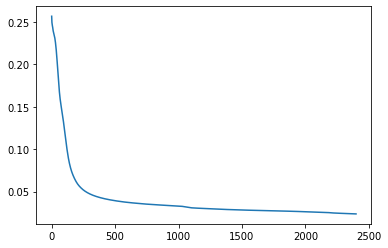

In [58]:
plt.plot(errors)

In [59]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test, 0.0001, parameters, training  = False)

In [60]:
y = np.where(y >= 0.5, 1, 0)

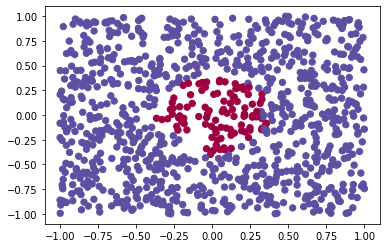

In [61]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral);